*Submitted By:*

**Md. Aukerul Moin Shuvo**


**Roll: 1603061**

***CSE, RUET.***


*Submitted To:*

**Prof. Dr. Md. Al Mamun**

***CSE, RUET.***

***Google Colab Link:*** https://colab.research.google.com/drive/1eMt6d9sMHDrn0Bca_fL2tyH0BFeF6ZR4?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libraries


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

**Smoothing Filter & Sharpening Filter in spatial domain:**

Smoothing Filter:
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
Sharpening Filter:
 [[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


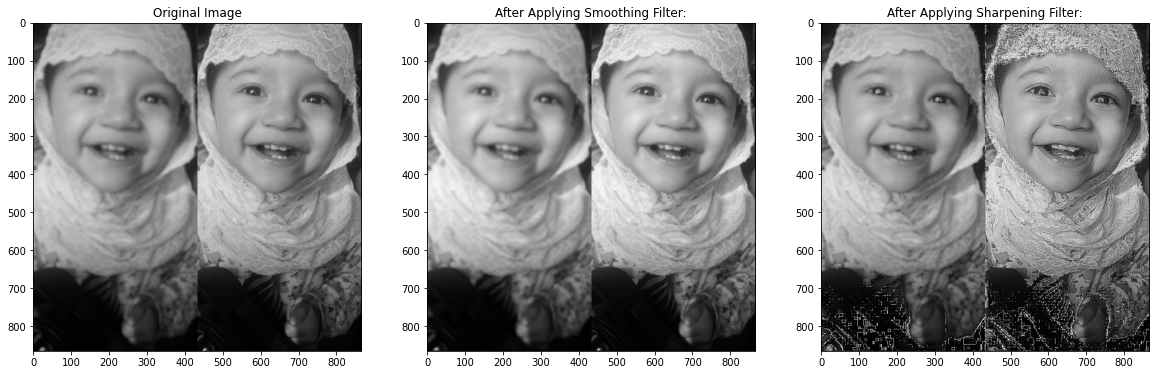

In [ ]:
# Reading the image
img = cv2.imread(r"/content/drive/My Drive/DIP/suha_blur_sharp.jpg", 0)
 
#shape of the input image
m, n = img.shape
 
#Averaging filter(3*3) smoothing_filter
smoothing_filter = np.ones([3, 3], dtype = int)
smoothing_filter[1,1] = 4
smoothing_filter[0,1] = 2
smoothing_filter[1,0] = 2
smoothing_filter[1,2] = 2
smoothing_filter[2,1] = 2
smoothing_filter = smoothing_filter / 16
 
#Sharpening Filter
sharpening_filter= np.ones([3, 3], dtype = int)
sharpening_filter[1,1] = -8
 
 
#Displaying the Filters
print(f'Smoothing Filter:\n {smoothing_filter}')
print(f'Sharpening Filter:\n {sharpening_filter}')
 
# Convolution process through every pixel of the image
smoothed_img = np.zeros([m, n])
sharpened_img =  np.zeros([m, n])
for i in range(1, m-1):
  for j in range(1, n-1):
    #Smoothing Convolution Window
    smoothed = img[i-1, j-1]*smoothing_filter[0, 0]+img[i-1, j]*smoothing_filter[0, 1]+img[i-1, j + 1]*smoothing_filter[0, 2]+img[i, j-1]*smoothing_filter[1, 0]+ img[i, j]*smoothing_filter[1, 1]+img[i, j + 1]*smoothing_filter[1, 2]+img[i + 1, j-1]*smoothing_filter[2, 0]+img[i + 1, j]*smoothing_filter[2, 1]+img[i + 1, j + 1]*smoothing_filter[2, 2]
    
    #Sharpening Convolution Window
    sharpened = img[i-1, j-1]*sharpening_filter[0, 0]+img[i-1, j]*sharpening_filter[0, 1]+img[i-1, j + 1]*sharpening_filter[0, 2]+img[i, j-1]*sharpening_filter[1, 0]+ img[i, j]*sharpening_filter[1, 1]+img[i, j + 1]*sharpening_filter[1, 2]+img[i + 1, j-1]*sharpening_filter[2, 0]+img[i + 1, j]*sharpening_filter[2, 1]+img[i + 1, j + 1]*sharpening_filter[2, 2]
    
    #Storing the convolution results to get image from it
    smoothed_img[i, j]= smoothed
    sharpened_img[i, j]= sharpened
 
#Plotting the images for comparison
plt.figure(figsize = (20,20))   
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
smoothed_img = smoothed_img.astype(np.uint8)
cv2.imwrite(r"/content/drive/My Drive/DIP/modified_smoothed.jpg", smoothed_img)
 
plt.subplot(1,3,2)
plt.title('After Applying Smoothing Filter:')
plt.imshow(smoothed_img, cmap='gray')
sharpened_img = sharpened_img.astype(np.uint8)
cv2.imwrite(r"/content/drive/My Drive/DIP/modified_sharpened.jpg", sharpened_img)
 
plt.subplot(1,3,3)
plt.title('After Applying Sharpening Filter:')
plt.imshow(img-sharpened_img, cmap='gray')

The explanation of the effects after applying the filters on the input image is given below:
 
**Smoothing filter:**
 
After applying smoothing filter in spatial domain of our input image, we get a blurry image for the high contrast part and a more blurry image for the blurry input part. This type of filters reduce noise and remove small details from a sharp image. They also bridge small gaps in lines or curves of the input. 
Here we used a 3*3 linear filter of weighted average. The filter replaces the value of the pixels by the average of the grey levels of the mask's neighbors. More weight is given to the center value, due to which the contribution of center becomes more than the rest of the values. Due to weighted average filtering, we can control the blurring of image. As most of the random noise in image consists of sharp transitions in grey levels, reducing them we get this output.
 
 
 
**Sharpening filter:**
 
As a sharpening filter, we used the Laplacian operator to apply on the spatial domain of our input image. This operator is used to enhance an image where we use two dimensional application of second order derivative for image transformation. Applying this, we get better result for the blurry part of our input image and a more sharpened image for the high contrast part. 
 
Laplace derivative operator highlights the grey level continuities of our input image and reduces regions with slowly varying gray levels. By doing this type of operation, the output image that is generated has blurry edge lines and dark and superimposed discontinuities. This also makes the background featureless.  We can recover it by adding the original and Laplace images further.

**Frequency Domain Filtering:**

Steps:
1. Multiplying the input image by (-1)^(x+y) to center the transformation
2. Dimensional Fourier Transformation(DFT) of the image from (1)
3. Filter Creation, Both: Low Pass and High Pass. Here I used Ideal Low Pass Filter and Ideal High Pass Filter
4. Multiplying the Fourier Transformed Image by the Filter 
5. Doing the Inverse Dimensional Fourier Transformation from (4)
6. Obtaining the image from Inverse DFT
7. Multiplying the image of (6) by (-1)^(x+y)

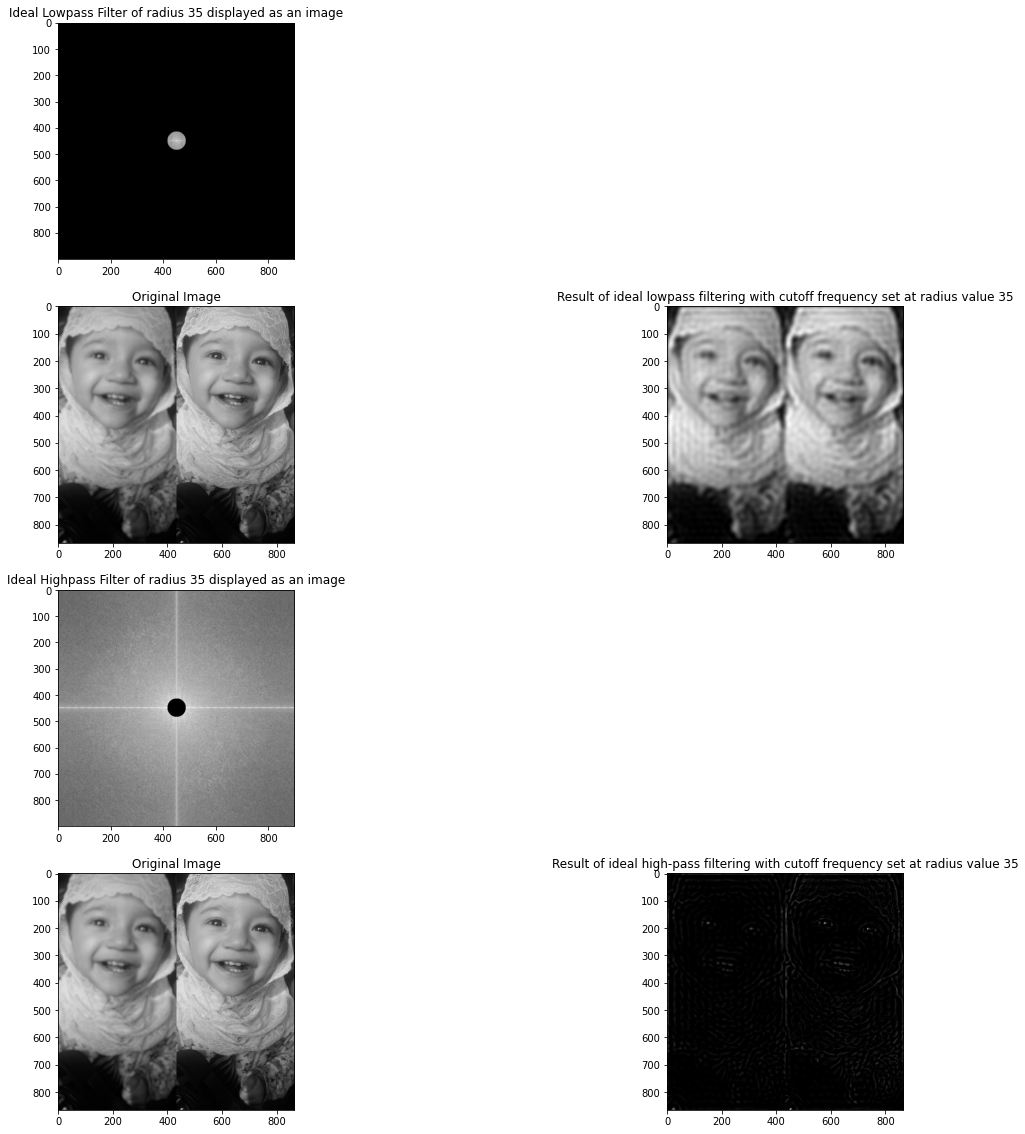

In [ ]:
#Defining Ideal Low Pass Filter:
def createLPFilter(shape, center, radius, n=2):
  rows, cols = shape[:2]
  r, c = np.mgrid[0:rows:1, 0:cols:1]
  c -= center[0]
  r -= center[1]
  #Distance from any point to the center of the Fourier transformation
  d = np.power(c, 2.0) + np.power(r, 2.0)
  lpFilter_matrix = np.zeros(shape, np.float32)
  #ideal low-pass filter transfer function
  lpFilter = np.copy(d)
  lpFilter[lpFilter < pow(radius, 2.0)] = 1
  lpFilter[lpFilter >= pow(radius, 2.0)] = 0
  lpFilter_matrix[:, :, 0] = lpFilter
  lpFilter_matrix[:, :, 1] = lpFilter
  return lpFilter_matrix
 
#Defining Ideal High Pass Filter:
def createHPFilter(shape, center, radius, n=2):
  rows, cols = shape[:2]
  r, c = np.mgrid[0:rows:1, 0:cols:1]
  c -= center[0]
  r -= center[1]
  #Distance from any point to the center of the Fourier transformation
  d = np.power(c, 2.0) + np.power(r, 2.0)
  hpFilter_matrix = np.zeros(shape, np.float32)
  #ideal high-pass filter transfer function
  hpFilter = np.copy(d)
  hpFilter[hpFilter < pow(radius, 2.0)] = 0
  hpFilter[hpFilter >= pow(radius, 2.0)] = 1
  hpFilter_matrix[:, :, 0] = hpFilter
  hpFilter_matrix[:, :, 1] = hpFilter
  return hpFilter_matrix
 
 
def stdFftImage(img_gray, rows, cols):
 
  fimg = np.copy(img_gray)
  fimg = fimg.astype(np.float32)
  # 1.Image matrix * (-1)^(r+c), Centralization
  for r in range(rows):
    for c in range(cols):
      if (r+c) % 2:
        fimg[r][c] = -1 * img_gray[r][c]
  img_fft = fftImage(fimg, rows, cols)
  return img_fft
 
#Dimensional Fourier Transformation 
def fftImage(img_gray, rows, cols):
  #Padding the image for making suitable for DFT
  rPadded = cv2.getOptimalDFTSize(rows)
  cPadded = cv2.getOptimalDFTSize(cols)
  imgPadded = np.zeros((rPadded, cPadded), dtype=np.float32)
  imgPadded[:rows, :cols] = img_gray
  img_fft = cv2.dft(imgPadded, flags=cv2.DFT_COMPLEX_OUTPUT)
  return img_fft
 
#Obtaining the real part of Fourier Transformed Image
def graySpectrum(fft_img):
  real = np.power(fft_img[:, :, 0], 2.0)
  imaginary = np.power(fft_img[:, :, 1], 2.0)
  amplitude = np.sqrt(real+imaginary)
  spectrum = np.log(amplitude+1.0)
  spectrum = cv2.normalize(spectrum, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  spectrum *= 255
  return amplitude, spectrum
 
  
# img_file 
img_gray = cv2.imread(r"/content/drive/My Drive/DIP/suha_blur_sharp.jpg", 0)
 
# 1.Fourier transform 
rows, cols= img_gray.shape
img_fft = stdFftImage(img_gray, rows, cols)
amplitude, _ = graySpectrum(img_fft)
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude) #The maximum value of the spectrum after centralization is at the center of the image
 
 
max_radius = np.sqrt(pow(rows, 2) + pow(cols, 2))/2
radius= 35  # This value can vary such as 5, 10, 20 etc
nrows, ncols = img_fft.shape[:2]
ilpFilter = createLPFilter(img_fft.shape, maxLoc, radius)
ihpFilter = createHPFilter(img_fft.shape, maxLoc, radius)
 
# 3.Low Pass Filter & High Pass Filter
img_filter = ilpFilter*img_fft
img_filter2 = ihpFilter*img_fft
_, gray_spectrum = graySpectrum(img_filter) 
_, gray_spectrum2 = graySpectrum(img_filter2) 
 
# 4.Inverse Fourier transform, and taking the real part for cutting and then decentralization
img_ift = cv2.dft(img_filter, flags=cv2.DFT_INVERSE+cv2.DFT_REAL_OUTPUT+cv2.DFT_SCALE)
img_ift2 = cv2.dft(img_filter2, flags=cv2.DFT_INVERSE+cv2.DFT_REAL_OUTPUT+cv2.DFT_SCALE)
 
#Final Image
ori_img = np.copy(img_ift[:rows, :cols])
ori_img2 = np.copy(img_ift2[:rows, :cols])
 
#Multiplying the image by (-1)^(x+y)
for r in range(rows):
  for c in range(cols):
    if(r+c)%2:
      ori_img[r][c] = -1*ori_img[r][c]
      ori_img2[r][c] = -1*ori_img2[r][c]
    # Truncating high and low values
    if ori_img[r][c] < 0:
      ori_img[r][c] = 0
    if ori_img[r][c] > 255:
      ori_img[r][c] = 255
    if ori_img2[r][c] < 0:
      ori_img2[r][c] = 0
    if ori_img2[r][c] > 255:
      ori_img2[r][c] = 255
        
ori_img = ori_img.astype(np.uint8)
ori_img2 = ori_img2.astype(np.uint8)
 
#Plotting the images for comparison
plt.figure(figsize = (20,20))   
plt.subplot(4,2,1)
plt.title('Ideal Lowpass Filter of radius 35 displayed as an image')
plt.imshow(gray_spectrum, cmap='gray')
 
plt.subplot(4,2,3)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
 
plt.subplot(4,2,4)
plt.title('Result of ideal lowpass filtering with cutoff frequency set at radius value 35')
plt.imshow(ori_img, cmap='gray')
 
plt.subplot(4,2,5)
plt.title('Ideal Highpass Filter of radius 35 displayed as an image')
plt.imshow(gray_spectrum2, cmap='gray')
 
plt.subplot(4,2,7)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
 
plt.subplot(4,2,8)
plt.title('Result of ideal high-pass filtering with cutoff frequency set at radius value 35')
plt.imshow(ori_img2, cmap='gray')

The explanation of the effects after applying the filters on the input image is given below:

**Low pass filter:**

Low pass filters are those which let the lower frequencies of an image to pass to the output but not the higher frequencies. This type of filters work as same as smoothing filters.
For our input image, this filter lets the frequencies pass which are below the cutoff frequency and the rest of the frequencies cannot. As a result of having only lower frequencies, the image we get is a blurry image for the high contrast part and a more blurry image for the blurry part. As more high-frequency information is filtered out, it can be seen from the above figure that the low-pass filter blurs the image.



**High pass filter:**

These filters are the total opposite of the low pass filters described above. They let only the higher frequencies than the cutoff frequency and the lower frequencies cannot pass to the output image. 
For our input image, this filter has two type of effects in two parts. For having only higher frequencies in the output image, we get more enhancement for the sharp part and the blurry part of the image gets enhanced resulting better.
Because the high pass filter filters out the low frequency information, it is found from the above figure that the high pass filter sharpens the image and only retains the edge information of the object in the image.